# Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

•  For the arriving airport, you can use the Destination column in the searches file. 

• Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

• Bonus point: Solving this problem using pandas (instead of any other approach)

## Import libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

## Data Path in my computer

In [11]:
!ls /home/dsc/Data/challenge/

bookings.csv.bz2		 searches_with_bookings.csv
bookings_without_duplicates.csv  searches_without_duplicates.csv
searches.csv.bz2


## Step 1: Let's start by working with a sample of our dataset

We will use the sample we have created in Exercise 1

In [12]:
searches_sample = pd.read_csv('searches.sample.csv.bz2',compression='bz2', sep='^')

In [13]:
searches_sample.shape

(999, 45)

In [14]:
searches_sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [15]:
searches_sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [16]:
searches_sample['Month'] = searches_sample['Date'].str[-5:-3]
searches_sample['Month']

0      01
1      01
2      01
3      01
4      01
       ..
994    01
995    01
996    01
997    01
998    01
Name: Month, Length: 999, dtype: object

In [17]:
mad_searches_sample = searches_sample[ searches_sample['Destination'] == 'MAD']
bcn_searches_sample = searches_sample[ searches_sample['Destination'] == 'BCN']
mal_searches_sample = searches_sample[ searches_sample['Destination'] == 'AGP']

In [18]:
searches_mad = mad_searches_sample.groupby("Month")[['Destination']].count()
searches_mad

,Destination
Month,
01,11


In [19]:
searches_bcn = bcn_searches_sample.groupby("Month")[['Destination']].count()
searches_bcn

,Destination
Month,
01,26


In [20]:
searches_mal = mal_searches_sample.groupby("Month")[['Destination']].count()
searches_mal

,Destination
Month,
01,7


Our sample is too small. We only have data for january. Let's create a bigger sample.

In [21]:
sample = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^',nrows=100000)

In [22]:
sample.shape

(100000, 45)

In [23]:
sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [24]:
sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [25]:
sample['Month'] = sample['Date'].str[-5:-3]
sample['Month']

0        01
1        01
2        01
3        01
4        01
         ..
99995    04
99996    04
99997    04
99998    04
99999    04
Name: Month, Length: 100000, dtype: object

In [26]:
mad_sample = sample[ sample['Destination'] == 'MAD']
bcn_sample = sample[ sample['Destination'] == 'BCN']
mal_sample = sample[ sample['Destination'] == 'AGP']

In [27]:
searches_mad = mad_sample.groupby("Month")[['Destination']].count()
searches_mad

,Destination
Month,
01,425
02,400
03,433
04,147


In [28]:
searches_bcn = bcn_sample.groupby("Month")[['Destination']].count()
searches_bcn

,Destination
Month,
01,517
02,497
03,536
04,174


In [29]:
searches_mal = mal_sample.groupby("Month")[['Destination']].count()
searches_mal

,Destination
Month,
01,169
02,147
03,187
04,31


In [30]:
madrid = searches_mad.reset_index()
barcelona = searches_bcn.reset_index()
malaga = searches_mal.reset_index()

Let's plot results:

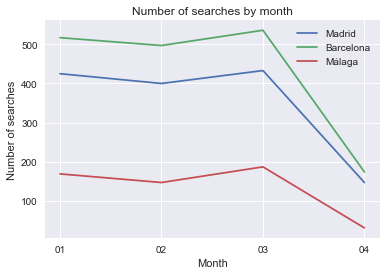

In [31]:
fig, ax = plt.subplots()

ax1= sns.lineplot(data=madrid, x='Month', y= 'Destination', label='Madrid')
ax2= sns.lineplot(data=barcelona, x='Month', y= 'Destination', label='Barcelona')
ax3= sns.lineplot(data=malaga, x='Month', y= 'Destination', label= 'Málaga')

ax.set_title('Number of searches by month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of searches')
ax.legend()

## Step 2: Let's try it now with a sample and by using chunks

We will do it now by using chunks and by selecting only 'Date' and 'Destination' columns in order to reduce the file size and the time of execution.

In [32]:
chksize = 10000

In [33]:
reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^', usecols=['Date','Destination'], nrows=100000, iterator=True, chunksize=chksize)
mad_chunks= []
bcn_chunks= []
mal_chunks= []
chunk_counter=0

for df in reader:
    df['Month'] = df['Date'].str[-5:-3]
    mad_chunk = df[ df['Destination'] == 'MAD']
    bcn_chunk = df[ df['Destination'] == 'BCN']
    mal_chunk = df[ df['Destination'] == 'AGP']
    mad_chunks.append(mad_chunk.groupby("Month")[['Destination']].count())
    bcn_chunks.append(bcn_chunk.groupby("Month")[['Destination']].count())
    mal_chunks.append(mal_chunk.groupby("Month")[['Destination']].count())
    chunk_counter+=1

print(chunk_counter)

10


In [34]:
searches_mad = pd.concat(mad_chunks)
searches_bcn = pd.concat(bcn_chunks)
searches_mal = pd.concat(mal_chunks)

In [35]:
searches_mad.sample(10)

,Destination
Month,
04,147
03,145
03,133
01,11
02,129
01,148
03,141
01,141
02,116


In [36]:
madrid = searches_mad.groupby("Month")[['Destination']].sum().reset_index()
barcelona = searches_bcn.groupby("Month")[['Destination']].sum().reset_index()
malaga = searches_mal.groupby("Month")[['Destination']].sum().reset_index()

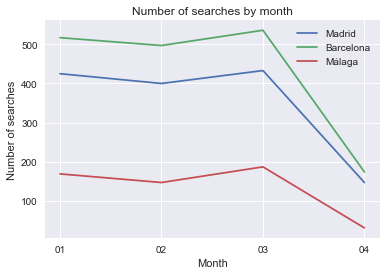

In [37]:
fig, ax = plt.subplots()

ax1= sns.lineplot(data=madrid, x='Month', y= 'Destination', label='Madrid')
ax2= sns.lineplot(data=barcelona, x='Month', y= 'Destination', label='Barcelona')
ax3= sns.lineplot(data=malaga, x='Month', y= 'Destination', label= 'Málaga')

ax.set_title('Number of searches by month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of searches')
ax.legend()

## Step 3: Let's try it now with the whole dataset

In [38]:
chksize = 500000

In [39]:
reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^', usecols=['Date','Destination'], iterator=True, chunksize=chksize)
mad_chunks= []
bcn_chunks= []
mal_chunks= []
chunk_counter=0

for df in reader:
    df['Month'] = df['Date'].str[-5:-3]
    mad_chunk = df[ df['Destination'] == 'MAD']
    bcn_chunk = df[ df['Destination'] == 'BCN']
    mal_chunk = df[ df['Destination'] == 'AGP']
    mad_chunks.append(mad_chunk.groupby("Month")[['Destination']].count())
    bcn_chunks.append(bcn_chunk.groupby("Month")[['Destination']].count())
    mal_chunks.append(mal_chunk.groupby("Month")[['Destination']].count())
    chunk_counter+=1

print(chunk_counter)

41


In [40]:
searches_mad = pd.concat(mad_chunks)
searches_bcn = pd.concat(bcn_chunks)
searches_mal = pd.concat(mal_chunks)

In [41]:
madrid = searches_mad.groupby("Month")[['Destination']].sum().reset_index()
barcelona = searches_bcn.groupby("Month")[['Destination']].sum().reset_index()
malaga = searches_mal.groupby("Month")[['Destination']].sum().reset_index()

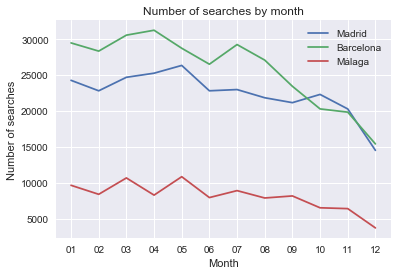

In [42]:
fig, ax = plt.subplots()

ax1= sns.lineplot(data=madrid, x='Month', y= 'Destination', label='Madrid')
ax2= sns.lineplot(data=barcelona, x='Month', y= 'Destination', label='Barcelona')
ax3= sns.lineplot(data=malaga, x='Month', y= 'Destination', label= 'Málaga')

ax.set_title('Number of searches by month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of searches')
ax.legend()

## Step 4: Bonus Point

Repeat the process dropping searches duplicated.

In [43]:
searches_sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice', 'Month'],
      dtype='object')

In order to define unique searches we will use 'Date', 'Time','OfficeID' and 'TerminalID' to drop duplicates.

Let's try first with a sample:

In [44]:
chksize = 10000

In [45]:
reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^', usecols=['Date','Time','OfficeID','TerminalID','Origin','Destination'], nrows=100000, iterator=True, chunksize=chksize)
all_chunks= []
chunk_counter=0

for df in reader:
    all_chunks=all_chunks.append(df)
    all_chunks.drop_duplicates(inplace=True)
    chunk_counter+=1

print(chunk_counter)

AttributeError: 'NoneType' object has no attribute 'drop_duplicates'

In [46]:
reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^', usecols=['Date','Time','OfficeID','TerminalID', 'Origin','Destination'], nrows=100000, iterator=True, chunksize=chksize)
all_chunks= pd.DataFrame()
chunk_counter=0

for df in reader:
    all_chunks=all_chunks.append(df)
    all_chunks.drop_duplicates(inplace=True)
    chunk_counter+=1
    print(chunk_counter)

1
2
3
4
5
6
7
8
9
10


In [47]:
all_chunks.shape

(100000, 6)

Apparently there were not duplicates in our sample so let's try it with the whole dataset:

In [48]:
chksize = 200000

In [49]:
%%time

reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^', usecols=['Date','Time','OfficeID','TerminalID','Origin','Destination'], iterator=True, chunksize=chksize)
all_chunks= pd.DataFrame()
chunk_counter=0

for df in reader:
    all_chunks=all_chunks.append(df)
    all_chunks.drop_duplicates(inplace=True)
    chunk_counter+=1
    print(chunk_counter)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
CPU times: user 4min 37s, sys: 6.04 s, total: 4min 43s
Wall time: 4min 11s


In [50]:
all_chunks.shape

(359004, 6)

In [51]:
all_chunks.sample(10)

,Date,Time,OfficeID,Origin,Destination,TerminalID
221063,2013-08-10,09:45:03,9882ec76abcca6210a1f862de4f0e500,HAJ,VKO,384b3e4f2669c26b266a9e78e28a88aa
232654,2013-08-21,07:21:22,9530f0a7e694bc9402885b4fa7e094bd,ESB,BEG,d41d8cd98f00b204e9800998ecf8427e
50941,2013-02-20,18:56:47,84d45f6fb4344fb462055952f2ee6358,LTN,ALC,d41d8cd98f00b204e9800998ecf8427e
60498,2013-03-02,20:16:01,3565e31495ecfd46fa018339d20382b1,AHB,JED,d41d8cd98f00b204e9800998ecf8427e
205587,2013-07-25,17:37:58,e198f381ded8956d7571df875eb640e6,LGW,LAX,d41d8cd98f00b204e9800998ecf8427e
40795,2013-02-10,19:38:38,7f45b8c2329242b93ccfcc1082036bc3,MXP,CTA,d41d8cd98f00b204e9800998ecf8427e
193103,2013-07-13,20:40:59,03a4fc8b3cd31d6d5b5d7b86d20f4af8,PMI,CGN,d41d8cd98f00b204e9800998ecf8427e
93569,2013-04-04,15:45:57,173666cb192bbba02a4ddd67a697ca0e,BRU,CPH,e6e95010299f4b6b8289154252b547d3
280167,2013-10-08,15:27:53,9c3131cfd29c41358299f0b75aa8425b,MIL,SSH,d41d8cd98f00b204e9800998ecf8427e
204627,2013-07-24,13:07:38,df90a2fbfaba0519322d3a2c92e7d70b,TPA,CTG,d41d8cd98f00b204e9800998ecf8427e


After dropping duplicates we only have 359003 rows to work with.

Let's continue with our analysis:

In [52]:
all_chunks.to_csv('/home/dsc/Data/challenge/searches_without_duplicates.csv',sep='^')

In [53]:
!ls /home/dsc/Data/challenge/

bookings.csv.bz2		 searches_with_bookings.csv
bookings_without_duplicates.csv  searches_without_duplicates.csv
searches.csv.bz2


In [54]:
chksize=10000

In [10]:
reader = pd.read_csv('/home/dsc/Data/challenge/searches_without_duplicates.csv', sep='^', usecols=['Date','Destination'], iterator=True, chunksize=chksize)
mad_chunks= []
bcn_chunks= []
mal_chunks= []
chunk_counter=0

for df in reader:
    df['Month'] = df['Date'].str[-5:-3]
    mad_chunk = df[ df['Destination'] == 'MAD']
    bcn_chunk = df[ df['Destination'] == 'BCN']
    mal_chunk = df[ df['Destination'] == 'AGP']
    mad_chunks.append(mad_ch.groupby("Month")[['Destination']].count())
    bcn_chunks.append(bcn_sample.groupby("Month")[['Destination']].count())
    mal_chunks.append(mal_sample.groupby("Month")[['Destination']].count())
    chunk_counter+=1
    print(chunk_counter)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


In [11]:
searches_mad = pd.concat(mad_chunks)
searches_bcn = pd.concat(bcn_chunks)
searches_mal = pd.concat(mal_chunks)

In [12]:
madrid = searches_mad.groupby("Month")[['Destination']].sum().reset_index()
barcelona = searches_bcn.groupby("Month")[['Destination']].sum().reset_index()
malaga = searches_mal.groupby("Month")[['Destination']].sum().reset_index()

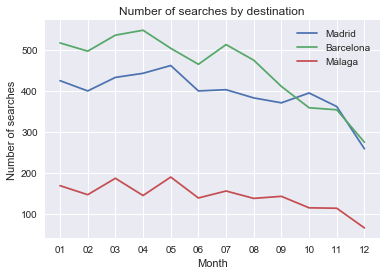

In [13]:
fig, ax = plt.subplots()

ax1= sns.lineplot(data=madrid, x='Month', y= 'Destination', label='Madrid')
ax2= sns.lineplot(data=barcelona, x='Month', y= 'Destination', label='Barcelona')
ax3= sns.lineplot(data=malaga, x='Month', y= 'Destination', label= 'Málaga')

ax.set_title('Number of searches by month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of searches')
ax.legend()